#### Mini-Project # 4

This project will focus on suitability analysis with raster data. Your tasks will be both conceptual-level and technical. 

At the conceptual level, you will define a suitability model of your choice, for an area of your choice. See https://en.wikipedia.org/wiki/Suitability_model for a brief description of what a suitability model is. For example, you may be looking for best areas for community gardens: these are often in underutilized land in residential land uses, with good soils, accessible (not steep slope), etc. So you would be looking for areas with a specific type of land use/land cover, with an appropriate range of values of slope, etc. You may build additional criteria based on a range of precipitaiton values, whether the area is affected by wildfires, has mild temperatures, low levels of soil erosion, has vegeration (eg derived from satellite imagery using NDVI), etc. Feel free to use the imagery layers we explored or mentioned during the raster-focused lectures. One of the cells in the last raster notebook contained a list of about a dozen such layers available through AGOL - but feel free to find more. You can use any two of the map combination techniques discussed in the lecture on Thu 5/9. You should clearly identify the map combination technique you use, and discuss any uncertainty issues associated with these specific techniques. 

As the outcome of this part, you will need to a) describe the suitability model you want to develop; b) identify the raster data layers you will use; and c) describe two of the map combination techniques you will use to derive the two suitablity maps, and their pros and cons. In your model you will need to combine at least 3 raster data layers.

The second part will involve implementing your suitability model using arcgis raster functions. For this exercise, we'll only use local functions, and possibly focal_statistics. This is the current state of implementation of raster functions accessible through python API and in ArcGIS Online. Examples of what works are in the lecture notebooks. Look throufgh the last notebook carefully, as there are a few extra cells not shown in the lecture, which demonstrate *working* map combination examples for different types of layers. 

Be creative - but I'd rather not have you wander into blind alleys too much as you look for a declared function and it is simply not there. Note that since some functions are associated with raster services, they depend on the version of the server a particular imagery layer is served from. See in the lecture notebooks how you can retrieve the version of API supported by each layer, and which functions are supported in each API. 

The third part will be a brief write-up comparing the two output rasters generated for your suitability model using the two map combination techniques. 

The notebook should include documentation of the steps, as usually.

### Names: 
Hetsvi Navnitlal
Emily Kwan 

### IDs:
A13595252
A14075665

1. Formulate a suitability model (markdown, about 100 words)

YOUR ANSWER HERE

The suitability model which we are making is relating to water in Mississippi Lafayette to have better understanding of where farming should be done. We are checking the rainfall levels, water table levels and the flood levels to see which area is best suited for farming. Water is an important aspect of farming so it is a good start to narrow down locations based on water availability. If farming is done further away from water getting water to the farms is incredibly costly. We also see which area has the highest frost free days and the highest water availabilty. Thus, the overall aim of this suitability model is to research the water levels, see froast free areas thus we can try to cut down the costs and narrow areas for farmers to chose from. 

In [1]:
# 2. Imports, etc. 
from arcgis import GIS
from IPython.display import display
gis = GIS(username='hnavnitl_UCSDOnline')
import arcgis.raster
from arcgis.raster import *
from arcgis.geocoding import geocode

Enter password: ········


In [2]:
# 3. List imagery layers to be used in your model. This cell should contian layer definitions. 
# Include at least three initial raster sources. 

In [3]:
#USA MEAN RAINFALL - 
#This layer displays average annual rainfall in inches for the period of January 1971 through December 2009.
rain = ImageryLayer("https://landscape3.arcgis.com/arcgis/rest/services/USA_Mean_Rainfall/ImageServer", gis) 

#USA SOILS FROAST FREE PERIOD - Annual Frost Free Period is the expected number of days between the last freezing temperature in 
#spring (January-July) and the first freezing temperature in fall (August-December). The number of days is based on the probability 
#that the values for the standard normal period will be exceeded in 5 years out of 10. 
frost = ImageryLayer("https://landscape11.arcgis.com/arcgis/rest/services/USA_Soils_Frost_Free_Days/ImageServer", gis)

# USA FLOOD HAZARD AREAS - This layer displays Flood Hazard Areas from the Flood Insurance Rate Map created by the Federal Emergency Management Agency.
flood = ImageryLayer("https://landscape11.arcgis.com/arcgis/rest/services/USA_Flood_Hazard_Areas/ImageServer", gis)

# USA SOILS WATER TABLE DEPTH - This layer displays the shallowest depth to water in the soil at any time of the year in centimeters.
water_table = ImageryLayer("https://landscape11.arcgis.com/arcgis/rest/services/USA_Soils_Water_Table_Depth/ImageServer", gis)

# Elevation added for the sake of the coordinate system
elevation = ImageryLayer('https://elevation.arcgis.com/arcgis/rest/services/WorldElevation/Terrain/ImageServer',gis)

In [4]:
# YOUR CODE HERE
raise NotImplementedError()

NotImplementedError: 

In [5]:
# 4. Derive the area of interest (AOI) and its geometry and extent. 
# The smaller the area the better (so that you don't run into raster size limitations)

In [6]:
study_area_gcd = geocode(address='Lafayette County', out_sr=rain.extent['spatialReference'])
study_area_extent = study_area_gcd[0]['extent']
counties_item = gis.content.search('USA Counties generalized', 'Feature Layer', outside_org=True)[0]
counties_lyr = counties_item.layers[0]
study_area_query = counties_lyr.query("FIPS='28071'", return_geometry=True)
study_area_geom= study_area_query.features[0].geometry
study_area_geom['spatialReference'] = study_area_query.spatial_reference
rain.extent = study_area_extent
frost.extent = study_area_extent
water_table.extent = study_area_extent
flood.extent = study_area_extent

In [7]:
# YOUR CODE HERE
raise NotImplementedError()

NotImplementedError: 

5. Name the two map combination techniques you will use to combine the data and describe their pros and cons (markdown) 

YOUR ANSWER HERE

The 2 map combination techinques we would use are:
1. Dominance 
   Pros:
   If one character is the most important and we only see that to 
   decide our decisions about the map, then dominance would be very 
   useful. For example, maximum profit.
   If we are looking at binary data then this is helpful to give us 
   what the majority wants. 
   
   Cons:
   The Cons are that it only gives importance to one character so
   if there is other characters which are influencing they would be ignored.

2. Contributory
   Pros:
   All play a role in decision making so if there are many factors which 
   help decide the output then contributory is important. 
   
   
   
   Cons:
   We might not know if something is more importance of less importance

In [13]:
# 6. Prepare your input layers for map combination: 
# clip to AOI, remap/normalize, add color map, visualize the layers and legends. 

In [18]:
#Non-Binary Colormap
clrmap =  [[5, 255, 255, 0], [4, 197, 219, 0],  
          [3, 139, 181, 0], [2, 86, 148, 0], [1, 38, 115, 0]]
rain_area = clip(raster = rain, geometry = study_area_geom)
rain_area = remap(raster=rain_area,
                  input_ranges=[56, 56.5, 56.5, 57, 57, 57.5, 57.5, 58, 58, 59],
                  output_values=[1,2,3,4,5], astype='U8')
rain_map = colormap(rain_area, colormap=clrmap)
rain_map.extent = study_area_extent

water_color =  [[4, 230, 0, 0], [3, 242, 85, 0], [2, 250, 142, 0], [1, 255, 195, 0]]
water_area = clip(raster = water_table, geometry = study_area_geom)
water_area = remap(raster=water_area,
                  input_ranges=[31, 61, 62, 100, 101, 200, 201, 400],
                  output_values=[1,2,3,4], astype='U8')
water_area_map = colormap(water_area, colormap=water_color)
water_area_map.extent = study_area_extent

flood_area = clip(raster = flood, geometry = study_area_geom)
clrmap2 =  [[1, 230, 0, 0], [0, 38, 115, 0]]
flood_area = remap(raster=flood_area,
                  input_ranges=[0.0,8.0, 8.0,15.0],
                  output_values=[1,0],  astype='U8')
flood_area_map = colormap(flood_area, colormap=clrmap2)
flood_area_map.extent = study_area_extent

frost_area = clip(raster = frost, geometry = study_area_geom)
clrmap7 =  [[7, 76, 0, 153], [6, 102, 0, 204], [5, 127, 0, 255], [4, 153, 51, 255 ], [3, 178, 102, 255], [2, 205, 153, 255],  
          [1, 229, 204, 255 ]]
frost_area = remap(raster=frost_area,
                  input_ranges=[0.0,50.0, 51.0,100.0, 101.0,150.0, 151.0,200.0, 201.0,250.0,
                                251.0,300.0, 301.0,365.0 ],
                  output_values=[1,2,3,4,5,6,7],  astype='U8')
frost_area_map = colormap(frost_area, colormap=clrmap7)
frost_area_map.extent = study_area_extent

map_1 = gis.map('Lafayette County, Mississippi')
map_1.add_layer(water_area_map)
map_1.add_layer(frost_area_map)
map_1.add_layer(flood_area_map)
map_1.add_layer(rain_map)

map_1.legend = True
map_1

#Binary Colormap
bin_color =  [[1, 230, 0, 0], [0, 38, 115, 0]]
rain_area = clip(raster = rain, geometry = study_area_geom)
rain_area_bin = remap(raster=rain_area,
                  input_ranges=[0.0, 57.0, 57.0, 100.0],
                  output_values=[0, 1], astype='U8')
rain_map_bin = colormap(rain_area_bin, colormap=bin_color)
rain_map.extent = study_area_extent

water_area = clip(raster = water_table, geometry = study_area_geom)
water_area_bin = remap(raster=water_area,
                  input_ranges=[0.0, 100.0,101.0, 400.0],
                  output_values=[1,0], astype='U8')
water_map_bin = colormap(water_area_bin, colormap=bin_color)
water_map_bin.extent = study_area_extent

elevation_area = clip(raster = elevation, geometry = study_area_geom)
elevation_area = remap(raster=elevation_area,
                  input_ranges=[0, 10000000],
                  output_values=[1], astype='U8')
elevation_map = colormap(elevation_area, colormap=bin_color)
elevation_map.extent = study_area_extent

flood_area = clip(raster = flood, geometry = study_area_geom)
flood_area.extent = study_area_extent
colour =  [[0, 230, 0, 0], [1, 38, 115, 0]]
flood_area = remap(raster=flood_area,
                   input_ranges=[2, 2, 1, 1],
                  output_values=[0, 1],  astype='U8')
flood_map_bin = colormap(flood_area, colormap= bin_color)

frost_area = clip(raster = frost, geometry = study_area_geom)
frost_area.extent = study_area_extent
frost_colour = [[1, 205, 153, 255],  
          [0, 229, 204, 255 ]]
frost_area = remap(raster= frost_area,
                  input_ranges=[0.0, 182.0, 182.0,365.0],
                  output_values=[1, 0],  astype='U8')
frost_map_bin = colormap(frost_area, colormap= frost_colour)

map_2 = gis.map('Lafayette County, Mississippi')
map_2.add_layer(rain_map_bin)
map_2.add_layer(frost_map_bin)
map_2.add_layer(flood_map_bin)
map_2.add_layer(water_map_bin)
map_2.legend = True
map_2

MapView(layout=Layout(height='400px', width='100%'), legend=True)

In [19]:
# YOUR CODE HERE
raise NotImplementedError()

NotImplementedError: 

In [20]:
# 7a. Generate a composite raster layer for your first map combination technique
# name of the technique (refer to lecture PPT):

In [21]:
# Dominance
rc_out1 = raster_calculator(rasters = [elevation_map, frost_map_bin], input_names = ["a","b"], expression = "a * b", extent_type='FirstOf', cellsize_type='FirstOf', astype='U8')
rc_out2 = raster_calculator(rasters = [rc_out1, flood_map_bin], input_names = ["a","b"], expression = "a * b", extent_type='FirstOf', cellsize_type='FirstOf', astype='U8')
rc_out = raster_calculator(rasters = [rc_out2, water_map_bin], input_names = ["a","b"], expression = "a * b", extent_type='FirstOf', cellsize_type='FirstOf', astype='U8')
rc_bc = colormap(rc_out, colormap= bin_color)

map_a = gis.map('Lafayette County, Mississippi')
map_a.legend=True
map_a.add_layer(rc_bc)
map_a

MapView(layout=Layout(height='400px', width='100%'), legend=True)

In [22]:
# YOUR CODE HERE
raise NotImplementedError()

NotImplementedError: 

In [23]:
# 7b. Generate a composite raster layer for your second map combination technique
# name of the technique (refer to lecture PPT):

In [24]:
# Contributatory
r2 = (elevation_map * 0) + (water_map_bin * 0.8)
r3 = r2 + (frost_map_bin * .1)
r4 = r3  + (flood_map_bin * .1)
r4_m = colormap(r4, colormap = bin_color)

map_b = gis.map('Lafayette County, Mississippi')
map_b.legend = True
map_b.add_layer(r4_m)
map_b

MapView(layout=Layout(height='400px', width='100%'), legend=True)

In [25]:
# YOUR CODE HERE
raise NotImplementedError()

NotImplementedError: 

In [26]:
# 8. Compare the results, and describe how different map combination techniques resulted in different outputs (or not.)
# 

The suitability model which we are making is relating to access to water in Lafayette County, Mississippi to have better understanding of where farming should ideally located. We want to analyze the levels of rainfall, water table depth levels and areas of high flood risk to see which area is best suited for farming. Water is a very important aspect of farming so it is a good start to narrow down locations based on water availability. If farming is done further away from sources of water, getting water to the farms is incredibly costly and can be wasteful of resources. We also see which area has the greatest amount of frost free days and the highest water availbilty. Thus, the overall aim of this suitability model is to research the water levels, find frost free areas in order to try to cut down the costs and narrow down areas for farms to chose from.

In [30]:
# YOUR CODE HERE
raise NotImplementedError()

NotImplementedError: 

## Extra Credit Issue Report

One issue we ran into was that when trying to combine the rainfall raster and any other raster using the raster calculator function, the output would be a question mark when it should have shown a map. Another potential issue was that  when trying to add two rasters, there would be simply be no output as there was shown in the lecture. However, if the combined raster was added to a map, then it would properly display.

In [31]:
# Issue 1
rc_out1 = raster_calculator(rasters = [rain_map_bin, frost_map_bin], input_names = ["a","b"], expression = "a * b", extent_type='FirstOf', cellsize_type='FirstOf', astype='U8')
rc_bc = colormap(rc_out1, colormap= bin_color)
rc_bc

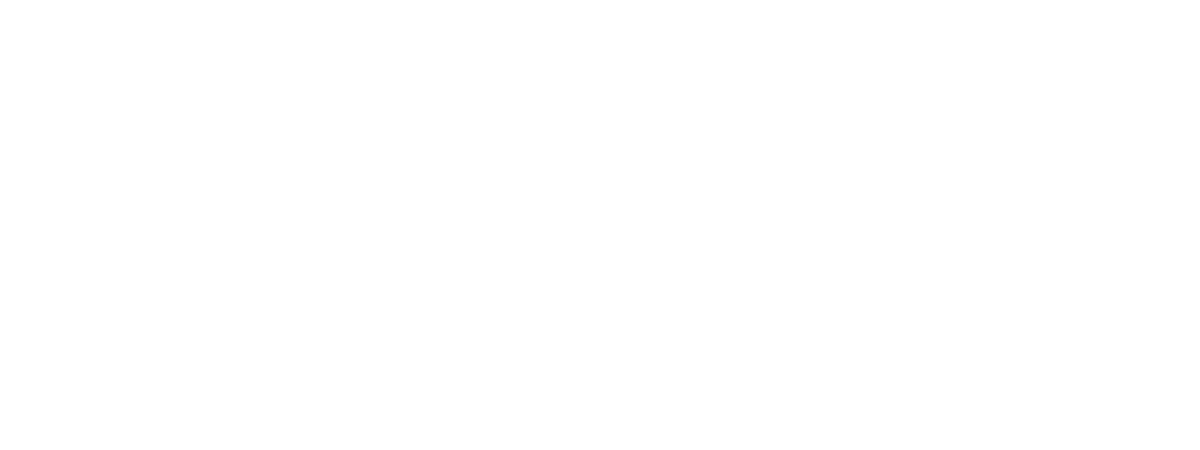

In [32]:
# Issue 2
rc_out1 = raster_calculator(rasters = [elevation_map, frost_map_bin], input_names = ["a","b"], expression = "a * b", extent_type='FirstOf', cellsize_type='FirstOf', astype='U8')
rc_out2 = raster_calculator(rasters = [rc_out1, flood_map_bin], input_names = ["a","b"], expression = "a * b", extent_type='FirstOf', cellsize_type='FirstOf', astype='U8')
rc_bc = colormap(rc_out2, colormap= bin_color)
rc_bc

In [33]:
rc_out1 = raster_calculator(rasters = [elevation_map, frost_map_bin], input_names = ["a","b"], expression = "a * b", extent_type='FirstOf', cellsize_type='FirstOf', astype='U8')
rc_out2 = raster_calculator(rasters = [rc_out1, flood_map_bin], input_names = ["a","b"], expression = "a * b", extent_type='FirstOf', cellsize_type='FirstOf', astype='U8')
rc_bc = colormap(rc_out2, colormap= bin_color)

map_1 = gis.map('Lafayette County, Mississippi')
map_1.legend=True
map_1.add_layer(rc_bc)
map_1

MapView(layout=Layout(height='400px', width='100%'), legend=True)

In [29]:
# Please let us know how much time you spent on this project, in hours: 
# (we will only examine distributions and won't look at individual responses)
#assignment_timespent = 15 hours 
#extracredit_timespent = 2 hours 